In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import Normalizer
from collections import Counter


In [3]:
#load iris dataset
iris=load_iris()

#create a dataframe, np.c_ is used to concatenate the columns
iris_df = pd.DataFrame(data = np.c_[iris['data'],iris['target']],columns=iris['feature_names'] + ['target'])

iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [4]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [8]:
x = iris_df.iloc[: , :-1]
y= iris_df.iloc[: , -1]

In [9]:
x.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [10]:
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: target, dtype: float64

In [15]:
#split the dataset into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x,y,
                                                    test_size = 0.2,
                                                    shuffle = True,
                                                    random_state= 0)
x_train = np.asarray(x_train)
y_train = np.asarray(y_train)

x_test = np.asarray(x_test)
y_test = np.asarray(y_test)

In [16]:
print(f'train set: {x_train.shape} \ntest set: {x_test.shape}')

train set: (120, 4) 
test set: (30, 4)


In [17]:
#Normalise the data
scaler = Normalizer().fit(x_train) #the scaler is fitted to train the data
normalized_x_train = scaler.transform(x_train)# training
normalized_x_test = scaler.transform(x_test)# testing



In [18]:
print('x train before Normalization')
print(x_train[:5])
print('x train after Normalization')
print(normalized_x_train[:5])


x train before Normalization
[[6.4 3.1 5.5 1.8]
 [5.4 3.  4.5 1.5]
 [5.2 3.5 1.5 0.2]
 [6.1 3.  4.9 1.8]
 [6.4 2.8 5.6 2.2]]
x train after Normalization
[[0.69804799 0.338117   0.59988499 0.196326  ]
 [0.69333409 0.38518561 0.57777841 0.1925928 ]
 [0.80641965 0.54278246 0.23262105 0.03101614]
 [0.71171214 0.35002236 0.57170319 0.21001342]
 [0.69417747 0.30370264 0.60740528 0.2386235 ]]


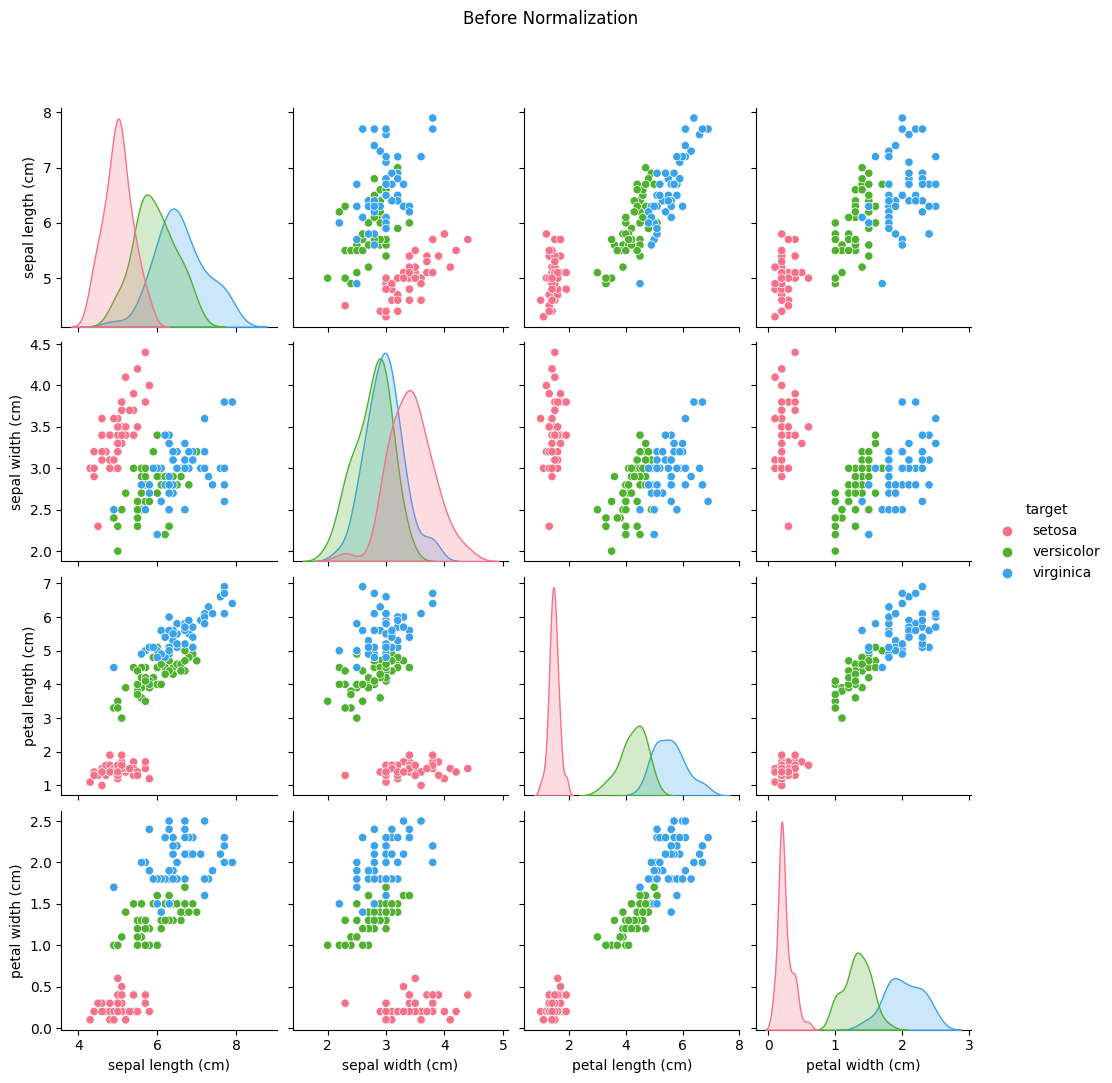

In [19]:
#visualize the dataset before and after normalization
## before normalization
dic = {0.0: 'setosa',1.0: 'versicolor', 2.0: 'virginica'}
before = sns.pairplot(iris_df.replace({'target' : dic}), hue='target', palette='husl')
before.fig.suptitle('Before Normalization', y = 1.08)
before.fig.savefig('before_normalization.png')

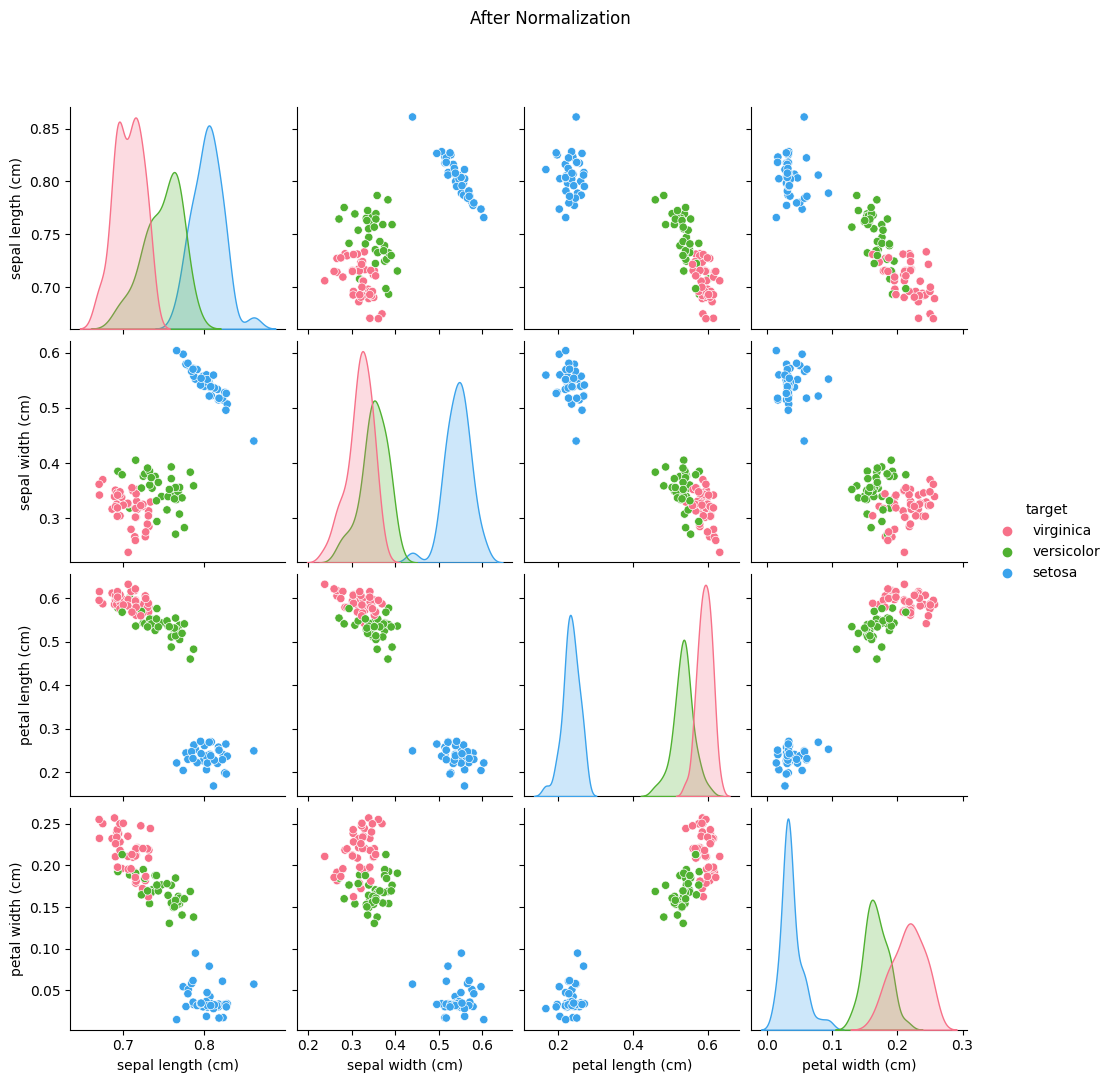

In [21]:
## after normalization
iris_df_2 = pd.DataFrame(data = np.c_[normalized_x_train,y_train],
                        columns = iris['feature_names'] + ['target'])
dic = {0.0: 'setosa',1.0: 'versicolor', 2.0: 'virginica'}
after = sns.pairplot(iris_df_2.replace({'target' : dic}), hue='target', palette='husl')
after.fig.suptitle('After Normalization', y = 1.08)
after.fig.savefig('after_normalization.png')


In [22]:
#KNN step 1: Calculate the distance between the test data and each row of the training data
def euclidean_distance(x_train,x_test_points):
    '''
    Input:
        x_train: training data
        x_test_points: test points
    Output:
        distance: the distance between the test points and each point in the training data.
    '''
    
    distances= []#list to store the distances
    for row in range(len(x_train)):
        current_train_point = x_train[row]
        current_distance = 0#intialize the distance to zero
        
        for col in range(len(current_train_point)):
            current_distance += (current_train_point[col] - x_test_points[col])**2
        current_distance  = np.sqrt(current_distance)
        
        distances.append(current_distance)
    distances= pd.DataFrame(distances, columns= ['distance'])
    return distances

In [23]:
#KNN step 2 : Get the k nearest neighbors
def nearest_neighbors(distance_point, K):
    '''
    Input:
        distance_point: the distance between the test point and each point in the training data
        K: the number of the nearest neighbors
    Output:
        neighbors: the k nearest neighbors
    '''
    #sort the distance using sort_values function and only take first K neighbors using head function.
    neighbors = distance_point.sort_values(by=['distance'], axis=0).head(K)
    return neighbors

In [27]:
#KNN step 3: Get the majority vote of the k nearest neighbors
def majority_vote(neighbors,y_train):
    '''
    Input:
        neighbors: the k nearest neighbors
        y_train: the target values of the training data
    Output:
        y_pred: the prediction based on the majority voting
    '''
# Use the counter object to get  the labels with the k nearest neighbors
    counter_vote = Counter(y_train[neighbors.index])

    y_pred = counter_vote.most_common()[0][0]
    return y_pred

In [28]:
#KNN step 4: Creating the KNN model
def KNN_Scratch(x_train, y_train,x_test,K):
    '''
    Input:
        x_train: the training data
        y_train: the training values of the training data
        x_test: the test data
        K: the number of nearest neighbors
    Output:
        y_pred: the prediction based on the majority voting
    '''
    y_pred = []# list to store the predictions
    
    for x_test_point in x_test:
        #calculate the distance between the test point and each point in the training data
        distance_point=euclidean_distance(x_train,x_test_point)
        
        #get k nearest neighbors
        neighbors = nearest_neighbors(distance_point, K)
        
        #get the majority vote of the k nearest neighbors
        y_pred_point = majority_vote(neighbors, y_train)
        
        #append the predicition to the list
        y_pred.append(y_pred_point)
    
    return y_pred

In [29]:
#KNN step 5: Testing the model
K = 3 # number of nearest neighbors
y_pred = KNN_Scratch(normalized_x_train, y_train, normalized_x_test, K)
print(y_pred)

[2.0, 1.0, 0.0, 2.0, 0.0, 2.0, 0.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 2.0, 0.0, 0.0, 2.0, 1.0, 0.0, 0.0, 2.0, 0.0, 0.0, 1.0, 1.0, 0.0]


In [30]:
#compare our model with the sklearn KNN model 
knn = KNeighborsClassifier(n_neighbors = K)
knn.fit(normalized_x_train, y_train)
y_pred_sklearn = knn.predict(normalized_x_test)
print(y_pred_sklearn)

print('<---------------------------------->')
#check is output is same 
print(set(y_pred == y_pred_sklearn))

[2. 1. 0. 2. 0. 2. 0. 1. 1. 1. 2. 1. 1. 1. 1. 0. 1. 2. 0. 0. 2. 1. 0. 0.
 2. 0. 0. 1. 1. 0.]
<---------------------------------->
{True}


In [31]:
#Evaluate the model
print('Accuracy of our model: ', accuracy_score(y_test, y_pred))
print('Accuracy of sklearn model: ',accuracy_score(y_test, y_pred_sklearn))

Accuracy of our model:  0.9666666666666667
Accuracy of sklearn model:  0.9666666666666667
